In [1]:
import pandas as pd 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pliki wejściowe  
 out1= r"Y:\baza\2020-08-07-B0449-S01-E03-T01-K03.c3d"  
 out2= r"Y:\baza\2020-08-07-B0449-S01-E03-T01-K04.c3d"  
 out3= r"Y:\baza\2020-08-07-B0448-S01-E03-T01-K03.c3d"  
 out4= r"Y:\baza\2020-08-07-B0449-S01-E04-T01-K04.c3d"  

In [97]:
df = pd.read_csv("out1.csv")  #wybieramy plik 
 #wybieramy podpisy dla 48 markerów
opisy=['LSHOx','LSHOy','LSHOz','LELBx','LELBy','LELBz','LWRAx','LWRAy','LWRAz','RSHOx','RSHOy','RSHOz','RELBx','RELBy','RELBz',
         'RWRAx','RWRAy','RWRAz','T10x','T10y','T10z','LASIx','LASIy','LASIz','LKNEx','LKNEy','LKNEz','LANKx','LANKy','LANKz','RASIx','RASIy','RASIz',
         'RKNEx','RKNEy','RKNEz','RANKx','RANKy','RANKz','Miecz1x','Miecz1y','Miecz1z','Miecz2x','Miecz2y','Miecz2z','Miecz3x','Miecz3y','Miecz3z']
# df=df.iloc[:, 10 12]
df=df.iloc[:, :48] #wyciagamy z pliku od 1 do 48 kolumny
# df=df.head(425)
df.shape

(425, 48)

# Standaryzacja i skalowanie danych

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [99]:
# pca = PCA().fit(scaled_data)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
# scaled_data[:5]
# features = scaled_data.T
# cov_matrix = np.cov(features)
# cov_matrix[:4]
# values, vectors = np.linalg.eig(cov_matrix)
# values[:5]
# vectors[:5]
# explained_variances = []
# for i in range(len(values)):
#     explained_variances.append(values[i] / np.sum(values))
 
# print(np.sum(explained_variances), '\n', explained_variances)
# projected_1 = scaled_data.dot(vectors.T[0])
# projected_2 = scaled_data.dot(vectors.T[1])
# res = pd.DataFrame(projected_1, columns=['PC1'])
# res['PC2'] = projected_2
# res['Y'] = y
# res.head()

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=48) # liczba głównych składowych
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_new = pca.inverse_transform(x_pca)
print("original shape:   ", scaled_data.shape)
print("transformed shape:", x_pca.shape)


original shape:    (425, 48)
transformed shape: (425, 48)


# PLOTOWANIE

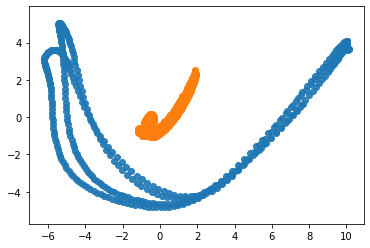

In [121]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.9)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.9)
plt.axis('equal');



Text(0, 0.5, 'Second Principal Component')

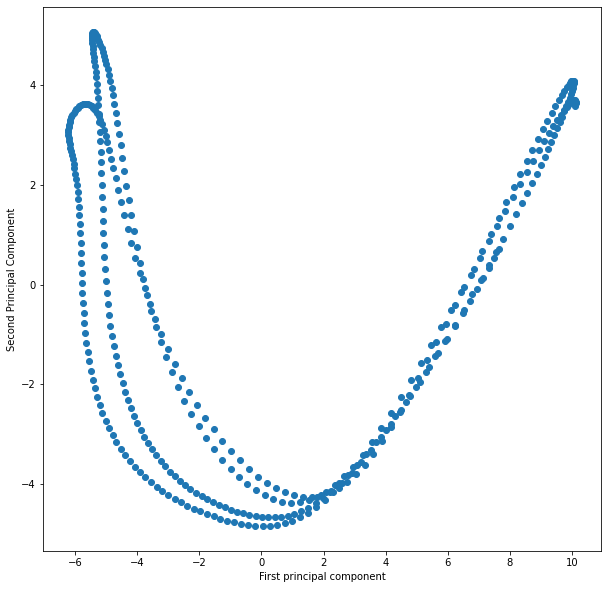

In [124]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [125]:
pca.components_

array([[ 0.17003344,  0.14499248,  0.03091595, ..., -0.16546021,
         0.17358125,  0.12134913],
       [ 0.08210141,  0.17201066, -0.29160811, ...,  0.05721549,
        -0.07200612,  0.01475362],
       [ 0.05355695,  0.00103674,  0.12538627, ...,  0.08985493,
         0.01176602,  0.44220925],
       ...,
       [ 0.15216451,  0.05187138, -0.02740262, ..., -0.15098399,
        -0.55171485, -0.10581299],
       [-0.34395418, -0.03835764, -0.01669494, ..., -0.01645025,
         0.0246931 ,  0.09609711],
       [-0.01953409,  0.03944114, -0.07238906, ..., -0.24054419,
         0.41422135,  0.06041009]])

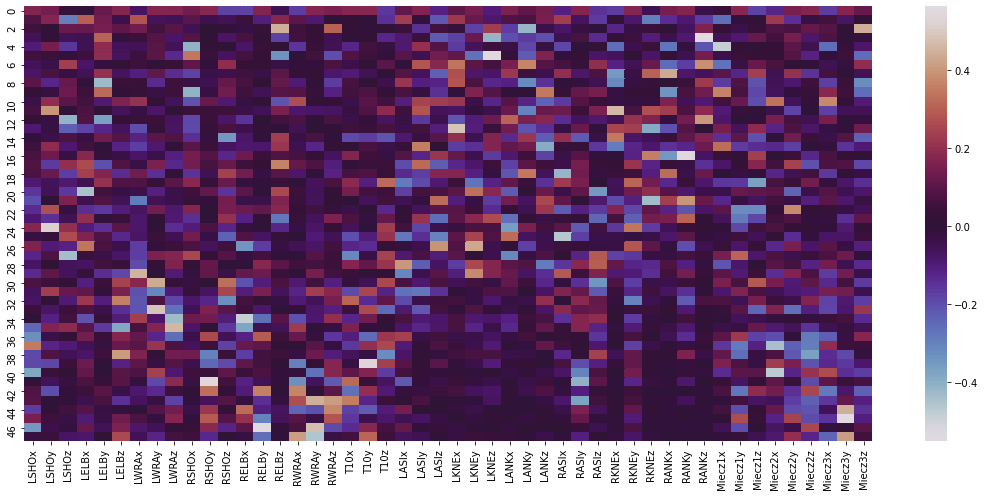

In [126]:
map= pd.DataFrame(pca.components_,columns=opisy)
plt.figure(figsize=(19,8))
sns.heatmap(map,cmap='twilight')

In [127]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      (pca.explained_variance_ratio_)  )

Components =  48 ;
Total explained variance =  [6.51294273e-01 2.16761631e-01 4.92747782e-02 3.39202769e-02
 2.04134224e-02 1.45885929e-02 3.83288919e-03 2.41417828e-03
 1.82595666e-03 1.44017309e-03 1.25717671e-03 8.03973622e-04
 7.57536676e-04 4.16098403e-04 3.79271762e-04 2.01345556e-04
 1.12046136e-04 8.37641709e-05 6.23166726e-05 5.27588063e-05
 3.18098902e-05 2.25754094e-05 2.01697562e-05 1.24917115e-05
 5.31845701e-06 4.65489265e-06 3.08573194e-06 2.67882353e-06
 1.46858735e-06 1.14273453e-06 7.37197401e-07 4.00408015e-07
 3.24427082e-07 2.20423589e-07 1.89311727e-07 1.22730116e-07
 6.67260636e-08 2.58591150e-08 1.87811790e-08 1.44250508e-08
 7.57872880e-09 5.53480005e-09 4.75493768e-09 2.18348170e-09
 1.59997126e-09 1.00260020e-09 7.93908918e-10 2.50570022e-10]


In [111]:
pca.components_

array([[ 0.17003344,  0.14499248,  0.03091595, -0.00079156,  0.12460771,
         0.17391444, -0.06609535,  0.17127646,  0.1713497 ,  0.13888714,
         0.17700002, -0.17408637, -0.17546531,  0.16852143, -0.04503402,
        -0.16440933,  0.1709321 ,  0.15390554,  0.17612746,  0.17817778,
        -0.15530836,  0.11376117,  0.16774627, -0.11152857,  0.10687899,
         0.14736909, -0.09773905,  0.15813762,  0.11011136,  0.14415917,
        -0.10769553,  0.17368875, -0.14788026, -0.16595884,  0.17115311,
        -0.04476746,  0.14825479,  0.1684581 , -0.03694254,  0.03650737,
         0.17686823, -0.17454354, -0.12013555,  0.1525282 ,  0.17312462,
        -0.16546021,  0.17358125,  0.12134913],
       [ 0.08210141,  0.17201066, -0.29160811,  0.30283459,  0.14290604,
        -0.0388326 ,  0.27812941, -0.06087417, -0.05583282,  0.10125852,
        -0.04078529, -0.05094664,  0.04213643, -0.10160796,  0.17727948,
         0.10430687, -0.0874534 ,  0.00903942,  0.02554297,  0.00055621,
   

In [112]:
print(pca.components_)

[[ 0.17003344  0.14499248  0.03091595 -0.00079156  0.12460771  0.17391444
  -0.06609535  0.17127646  0.1713497   0.13888714  0.17700002 -0.17408637
  -0.17546531  0.16852143 -0.04503402 -0.16440933  0.1709321   0.15390554
   0.17612746  0.17817778 -0.15530836  0.11376117  0.16774627 -0.11152857
   0.10687899  0.14736909 -0.09773905  0.15813762  0.11011136  0.14415917
  -0.10769553  0.17368875 -0.14788026 -0.16595884  0.17115311 -0.04476746
   0.14825479  0.1684581  -0.03694254  0.03650737  0.17686823 -0.17454354
  -0.12013555  0.1525282   0.17312462 -0.16546021  0.17358125  0.12134913]
 [ 0.08210141  0.17201066 -0.29160811  0.30283459  0.14290604 -0.0388326
   0.27812941 -0.06087417 -0.05583282  0.10125852 -0.04078529 -0.05094664
   0.04213643 -0.10160796  0.17727948  0.10430687 -0.0874534   0.00903942
   0.02554297  0.00055621 -0.14339651  0.23161858 -0.00436364 -0.21577457
   0.2208746   0.12566643 -0.0838371   0.0811834   0.07644032  0.15245284
   0.23567313 -0.06449773 -0.16159961 